---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Week 5 Lab Exercises: **Training a Classification Model & Typical ML process**</font></div>
---

# Introduction

During the last couple of weeks we learned about how to read data, do exploratory data analysis (EDA) and prepare data for training and training a ML model. However, we did not specifically discuss the typical ML pipeline. In this lab we will go through a typical ML model development process using a classification task as an example.

The lab assumes that you have completed the labs for week 2-4. If you havent yet, please do so before attempting this lab. 

The lab can be executed on either your own machine (with anaconda installation) or on AWS educate classroom setup for the course. 
- Please refer canvas for instructions on installing anaconda python or setting up AWS Sagemaker notebook: [Introduction to Amazon Web Services (AWS) Classrooms](https://rmit.instructure.com/courses/79534/pages/introduction-to-amazon-web-services-aws-classrooms?module_item_id=2952364)


## Objective
- Continue to familiarise with Python and other ML packages
- Learn to train a model for classification problem
- Practice typical ML model development process. 


## Dataset
In this lab, we will be using the `Cardiotocography Data Set` from UCI [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Cardiotocography). The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians. 2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was respect the fetal state (0=normal; 1=suspect; 2=pathologic). The version used in this lab is a modified version of the original dataset and, the columns of the original dataset are:

1. LB - FHR baseline (beats per minute)  
2. AC - # of accelerations per second  
3. FM - # of fetal movements per second  
4. UC - # of uterine contractions per second  
5. DL - # of light decelerations per second  
6. DS - # of severe decelerations per second  
7. DP - # of prolongued decelerations per second  
8. ASTV - percentage of time with abnormal short term variability
9. MSTV - mean value of short term variability
10. ALTV - percentage of time with abnormal long term variability
11. MLTV - mean value of long term variability
12. Width - width of FHR histogram
13. Min - minimum of FHR histogram
14. Max - Maximum of FHR histogram
15. Nmax - # of histogram peaks
16. Nzeros - # of histogram zeros
17. Mode - histogram mode
18. Mean - histogram mean
19. Median - histogram median
20. Variance - histogram variance
21. Tendency - histogram tendency
22. TARGET: NSP - fetal state class code (0=normal; 1=suspect; 2=pathologic)

**The task for this lab is to predict if a new fetal measurement is 0=normal; 1=suspect; 2=pathologic.**


First, ensure the data file is located within the Jupyter workspace. 
- If you are on the local machine copy the file (`Cardiotocography_Data_Set_subset.csv`) to your current folder.
- If you are on AWS you can upload the data to the notebook instance by clicking the `upload files` icon on the left sidebar.

# Load the dataset and some cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./Cardiotocography_Data_Set_subset.csv', delimiter=',')
data.head()

,LB,FM,ASTV,ALTV,Width,Nmax,Mode,Mean,Median,Variance,NSP
0,120,0,73,43,64,2,120.0,137,121,73,2
1,132,0,17,0,130,6,141.0,136,140,12,1
2,133,0,16,0,130,5,141.0,135,138,13,1
3,134,0,16,0,117,11,137.0,134,137,13,1
4,132,0,16,0,117,9,137.0,136,138,11,1


Transform the target to match the task

In [2]:
print(set((data['NSP']).astype(np.int)))

{1, 2, 3}


In [3]:
data['NSP'] =  (data['NSP']).astype(np.int) - 1 
print(set((data['NSP']).astype(np.int)))

{0, 1, 2}


Usually we need to check if there are missing values and identify an action to handle them. Lets check if the data has any missing values. You can use the pandas `describe` to see if there are any columns with less number of items than others.

In [4]:
data.describe()

,LB,FM,ASTV,ALTV,Width,Nmax,Mode,Mean,Median,Variance,NSP
count,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2113.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,7.241298,46.990122,9.84666,70.445908,4.068203,137.450544,134.610536,138.090310,18.808090,0.304327
std,9.840844,37.125309,17.192814,18.39688,38.955693,2.949386,16.390810,15.593596,14.466589,28.977636,0.614377
min,106.000000,0.000000,12.000000,0.00000,3.000000,0.000000,60.000000,73.000000,77.000000,0.000000,0.000000
25%,126.000000,0.000000,32.000000,0.00000,37.000000,2.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.000000,49.000000,0.00000,67.500000,3.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,2.000000,61.000000,11.00000,100.000000,6.000000,148.000000,145.000000,148.000000,24.000000,0.000000
max,160.000000,564.000000,87.000000,91.00000,180.000000,18.000000,187.000000,182.000000,186.000000,269.000000,2.000000


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - We can see that the `mode` column has only 2113 items while other columns all have 2126 items.


if there are missing values in the dataset, they are generally represented as Nan Values. Lets check for Nan values.

In [5]:
pd.isna(data).sum()

LB           0
FM           0
ASTV         0
ALTV         0
Width        0
Nmax         0
Mode        13
Mean         0
Median       0
Variance     0
NSP          0
dtype: int64

The `Mode` column has 13 NaN values. We can find which instances/rows this corresponds to:

In [6]:
data[pd.isna(data).any(axis=1)]

,LB,FM,ASTV,ALTV,Width,Nmax,Mode,Mean,Median,Variance,NSP
9,122,0,86,6,68,1,NaN,122,123,1,2
62,142,0,25,0,26,0,NaN,145,147,2,0
103,125,1,29,0,29,0,NaN,130,132,1,0
135,159,0,66,13,24,0,NaN,164,166,0,1
152,140,1,41,0,121,12,NaN,149,154,30,0
175,119,0,31,0,134,7,NaN,127,127,7,0
203,120,4,57,0,21,0,NaN,123,124,1,0
259,127,0,13,0,98,3,NaN,124,129,35,0
315,146,14,68,23,20,1,NaN,147,148,1,1
376,141,28,53,28,123,13,NaN,149,154,10,1


<span style="font-size:1.5em;">�</span> What are the possible actions we can take?

> <span style="font-size:1em;">✔</span> **Actions:** 
> - We can remove the above rows from the dataset. This will lead to loss of some information as we will lose the other attribute information in those rows.
> - We can replace the missing values with zero (or the mean of that column with missing values). Need to see if this is reasonable for a given attribute. 
> - We can use another feature(s) to predict the missing values and use that. 

**For this problem** we can observe that the `Mode` and the `Median` (or `Mean`) has a very strong correlation (See EDA results that appear later). therefore we can use the value of the `Median` to replace the missing values of `Mode`.
Generally we might have to train a ML model to predict the missing attributes (x: `median` , y: `Mode`). However for this problem we can even directly replace the missing mode values without building a model.

In [7]:
data.loc[pd.isna(data['Mode']), 'Mode'] = data.loc[pd.isna(data['Mode']), 'Median']

In [8]:
pd.isna(data).sum()

LB          0
FM          0
ASTV        0
ALTV        0
Width       0
Nmax        0
Mode        0
Mean        0
Median      0
Variance    0
NSP         0
dtype: int64

# EDA

In the following, I have shown you several techniques that can be used to analyse the data for this dataset. However, this is not an exhaustive set of techniques. 

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: We have leaned about doing an EDA in lab 02 and you are left to explore the possible techniques tor this problem. Do not limit your self to techniques presented in the class. </font>**  

Lets first see if there are patterns in scatter plots of two variable at a time. 

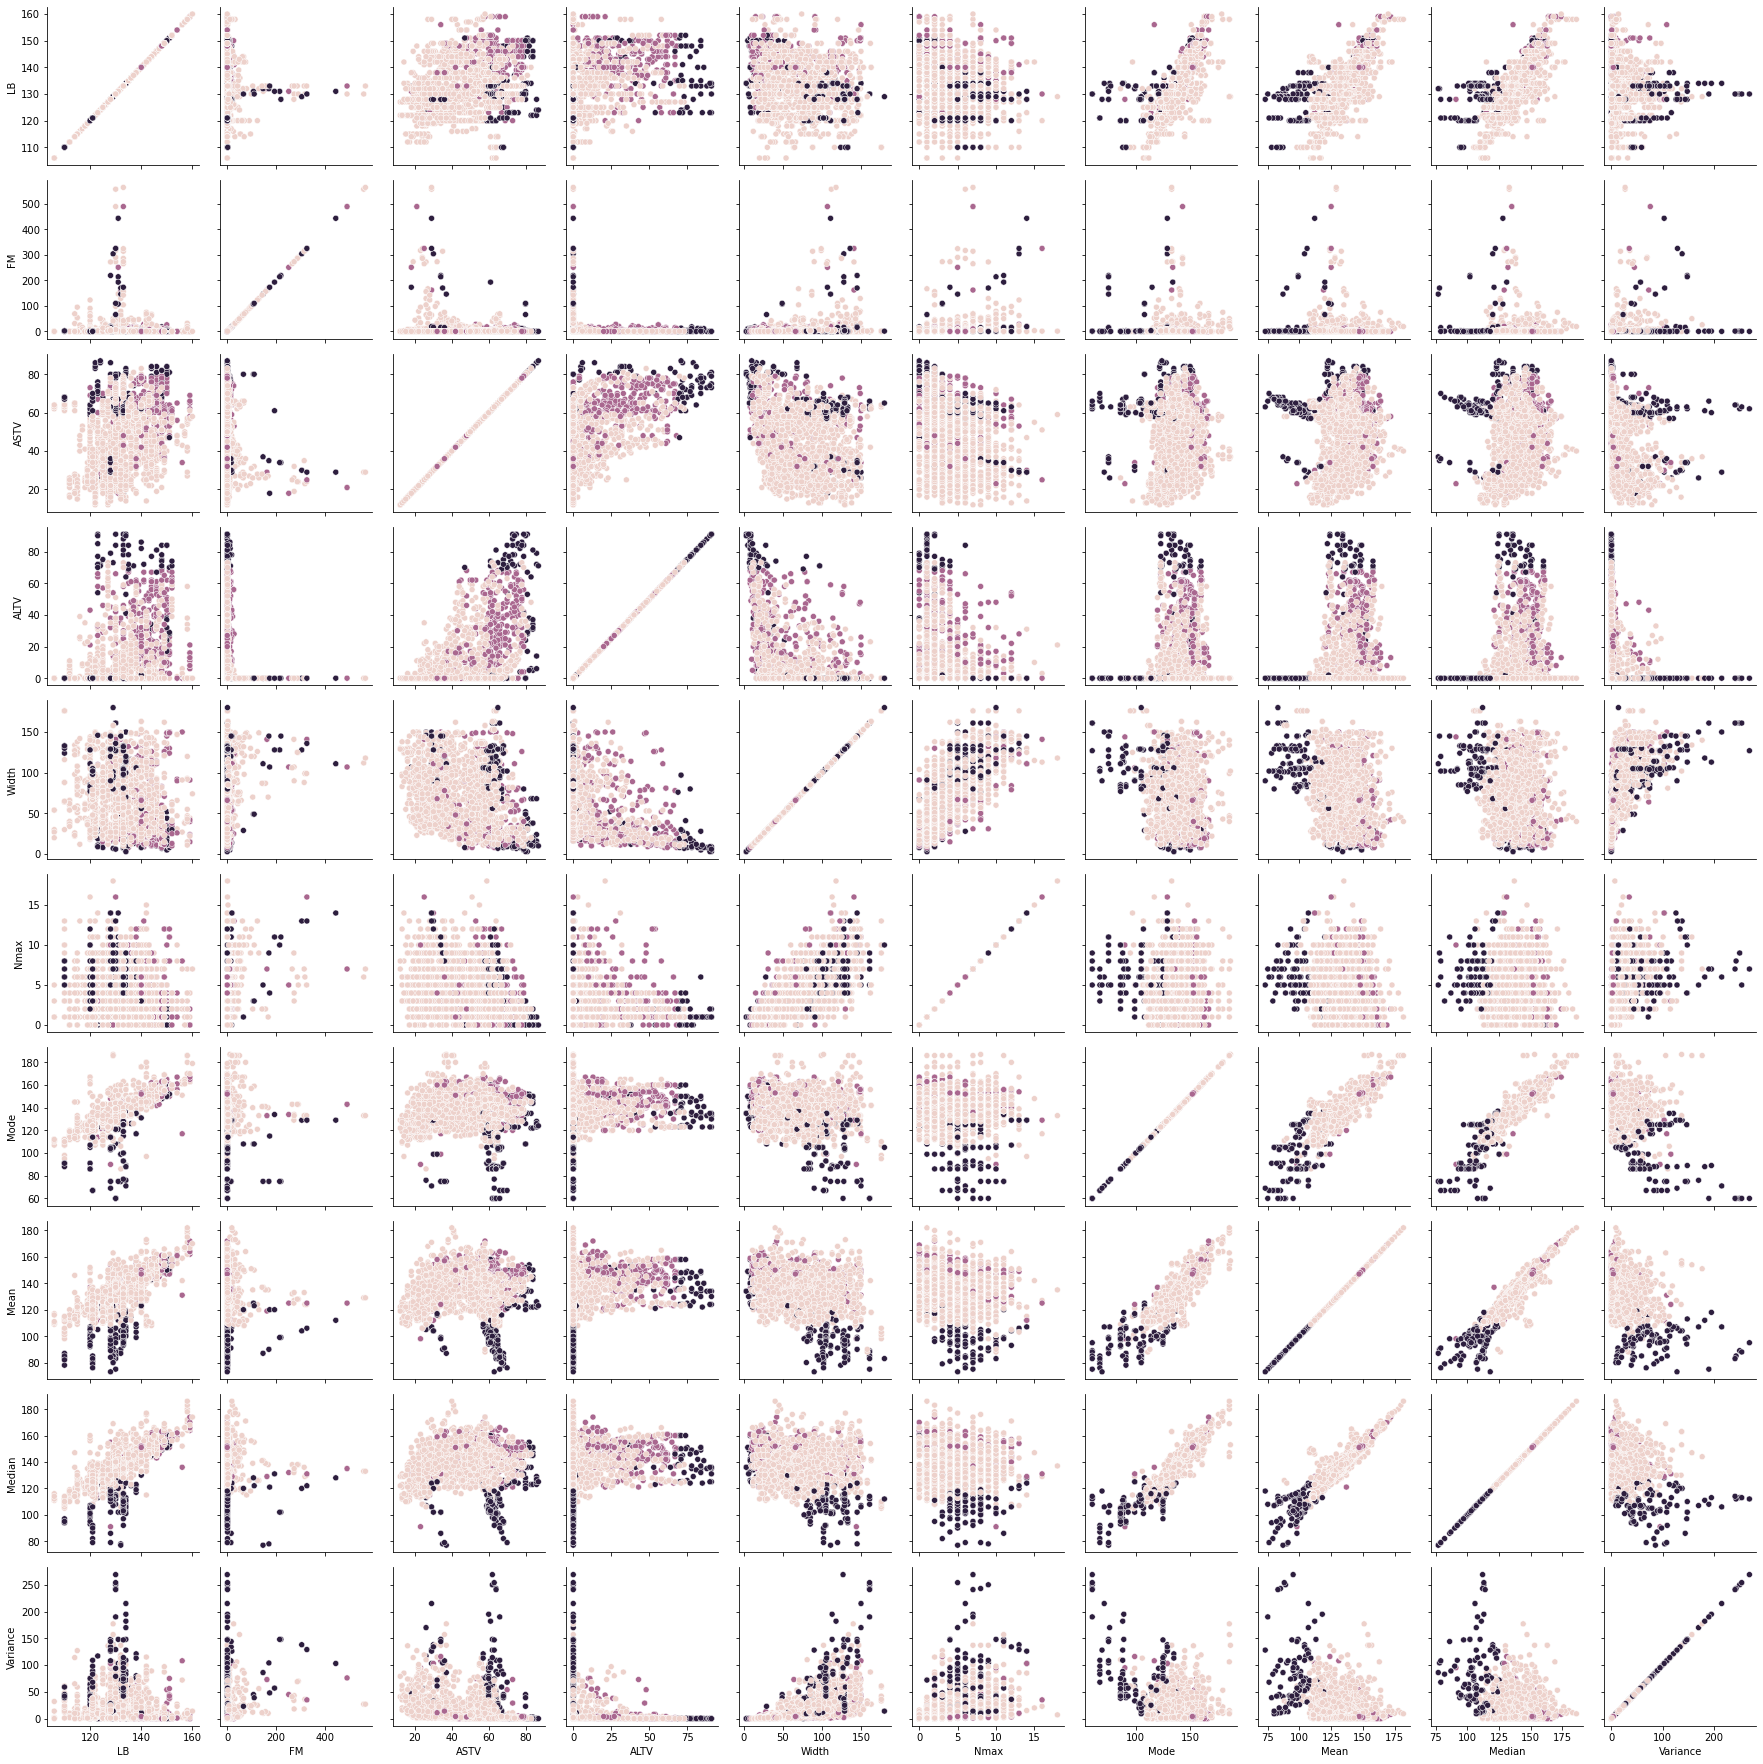

In [9]:
import seaborn as sns

g = sns.PairGrid(data, vars=['LB','FM' , 'ASTV' , 'ALTV', 'Width', 
                             'Nmax', 'Mode', 'Mean', 'Median', 'Variance'], hue="NSP")
g.map(sns.scatterplot)
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Some plots show that a non-linear decision boundary might be able to separate the two classes. e.g. ASTV vs ASTL
> - Some plots show that a linear decision boundary might be able to separate the two classes. e.g. Median vs Variance

lets also observe the correlation plot

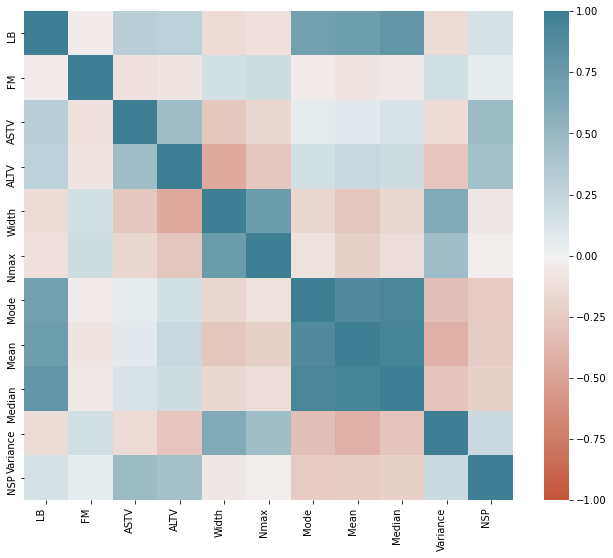

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<span style="font-size:1.5em;">�</span> What observations did you make?

Since we have discussed this in class, I will leave this as an exercise for you. Discuss with the lab demonstrator in class.

Another thing that is interesting is to see the class distribution

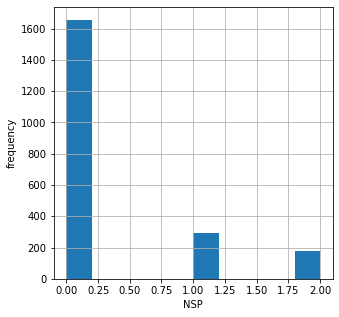

In [11]:
data['NSP'].hist(figsize=(5,5))
plt.xlabel('NSP')
plt.ylabel('frequency')
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

Since we have discussed this in class, I will leave this as an exercise for you. Discuss with the lab demonstrator in class.

# Typical Model development process

As discussed in the lecture, the typical ML model development process consists of 4 steps, lets go through each and see how it is done. 

1. **Determine your goals**: Performance metric and target value. Problem dependent.

2. **Setup the experiment**: Setup the test/validation data, visualisers and debuggers needed to determine bottlenecks in performance (overfitting/under-fitting, feature importance).

3. **Default Baseline Model**: Identify the components of end-to-end pipeline including - Baseline Models, cost functions, optimisation.

4. **Make incremental changes**: Repeatedly make incremental changes such as gathering new data, adjusting hyper-parameters, or changing algorithms, based on specific findings from your instrumentation.

## Setting up the performance (evaluation) metric
There are many performance metrics that apply to this problem such as `accuracy_score`, `f1_score`, etc. More information on performance metrics available in sklearn can be found at: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

The insights gained in the EDA becomes vital in determining the performance metric. Try to identify the characteristics that are important in making this decision from the EDA results. Use your judgment to pick the best performance measure - discuss with the lab demonstrator to see if the performance measure you came up with is appropriate. 


In this task, I want to give equal importance to all three classes therefore I will select `macro-averaged` `f1_score` as my performance measure and I wish to achieve a target value of 85% f1_score. 

F1-score is NOT the only performance measure that can be used for this problem.


> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Read this article on [f1_score](https://sebastianraschka.com/faq/docs/computing-the-f1-score.html).</font>**  


## Setup the experiment - data splits

Next **what data should we use to evaluate the performance?**


We can generate "simulated" unseen data in several methods
1. Hold-Out validation
2. Cross-Validation

Usually you will select a technique that is most appropriate to the dataset given to you. However as we are interested in learning about the techniques Lets look at both techniques.

## Hold-out Validation

In hold out validation we divide the data into 3 subsets:
1. Training: to obtaining the parameters or the weights of the hypothesis
2. Validation: for tuning hyper-parameters and model selection.
3. To evaluate the performance of the developed model. DO NOT use this split to set or tune any element of the model.

For this example lets divide the data into 60/20/20

In [12]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(data, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(train_data_, test_size=0.25, 
                                            shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0], test_data.shape[0])

1275 425 426


Lets convert the data to np arrays

In [13]:
train_X = train_data.drop(['NSP',], axis=1).to_numpy()
train_y = train_data[['NSP']].to_numpy()

test_X = test_data.drop(['NSP',], axis=1).to_numpy()
test_y = test_data[['NSP']].to_numpy()

val_X = val_data.drop(['NSP',], axis=1).to_numpy()
val_y = val_data[['NSP']].to_numpy()

Lets setup some functions to get the performance.

In [14]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

## Baseline model

We need to select a baseline mode to do this task. I am going to select `regularised polynomial logistic regression` for this example.

*There are better models than this, however we only know logistic regression technique that can be used for this problem at the moment, therefore out choices are limited and the decision is simple.* If we had other options, we need to use our knowledge on those techniques and  the EDA to select the best base model. 

The polynomial model is justified because in the EDA we can see that a non-linear decision boundary can separate the classes. regularisation is justified because we have correlated attributes and in EDA we also had some features where a linear decision boundary looked appropriate. 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)
val_X = poly.transform(val_X)

When using polynomial features it is very important to scale the features. Lets do a minmax normalisation. Again you can leverage the EDA to select the appropriate scaling mechanism. 

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

Lets check the un-regularised linear model - just to check if everything is in order. You will notice a warning saying the max_iter was reached. 

Ideally we would increase the number of maximum iterations and see if it solves the problem. For now lets ignore the warning. 

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.858
Validation F1-Score score: 0.779


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For this task the baseline model achieved good training performance. However we can see a gap between the Train Accuracy and the Validation Accuracy (generalisation GAP). 

**What can we do when there is a GAP between Train and Validation performance?**

- We can apply regularisation. The process is important. we start with a base model and then improve it based on our observations.

## Apply regularisation

When applying regularisation we need to select the lambda value. For this we can use
1. Grid search
2. Random search


We will do grid search in this example. in grid search we establish a set of lambda values in a frid. Selecting the range of lambda values is a process mostly done with trial and error.

ones we select a set of lambda values, we train a classifier for each of those lambda values and evaluate the performance. 

In [18]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced').fit(train_X, train_y.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

Now lets plot the training and validation performance for each lambda value in out lambda values set and see what is the best lambda value. You might have to repeat the process of selecting lambda values if the results are not as expected.

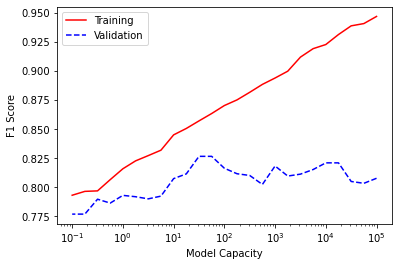

In [19]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [20]:
print(1.0/lambda_paras)

[1.00000000e+05 5.62341325e+04 3.16227766e+04 1.77827941e+04
 1.00000000e+04 5.62341325e+03 3.16227766e+03 1.77827941e+03
 1.00000000e+03 5.62341325e+02 3.16227766e+02 1.77827941e+02
 1.00000000e+02 5.62341325e+01 3.16227766e+01 1.77827941e+01
 1.00000000e+01 5.62341325e+00 3.16227766e+00 1.77827941e+00
 1.00000000e+00 5.62341325e-01 3.16227766e-01 1.77827941e-01
 1.00000000e-01]


<span style="font-size:1.5em;">�</span> What lambda value would you pick as your final value?

We generally pick the lambda value that corresponds to the maximum validation performance and minimum generalisation GAP. In this case it is ?? 

In [21]:
clf = LogisticRegression(penalty='l2', C = 40.0, random_state=0, 
                         solver='liblinear', max_iter=1000, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.859
Validation F1-Score score: 0.826


<span style="font-size:1.5em;">�</span> Is this a better model than the un-regularised model? Why?

<span style="font-size:1.5em;">�</span> Have we achieved our Target?

- We set out target at 85% fi-score. However we have only reached approximately 83% here. What would you do next? Discuss with your tutor.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Identify other hyper-parameters and device a mechanism to tune then under hold-out validation framework.</font>**  

Discuss your answer with the lab demonstrator.

## Testing the hypothesis (or model)

Lets now assume that we have reached the best performance we can achieve. The next step is to test the hypothesis (or model) we have developed and see if we can trust the model to generalise to unseen data. This is where the test data comes in. 

Lets see how the model performs on test data. Below I have shown some useful techniques that can be used to observe the testing performance. 

In [22]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred,))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       326
           1       0.55      0.72      0.62        58
           2       0.75      0.93      0.83        42

    accuracy                           0.86       426
   macro avg       0.75      0.84      0.79       426
weighted avg       0.88      0.86      0.87       426



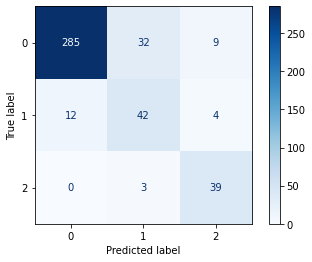

In [23]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_y,
                                 cmap=plt.cm.Blues)
plt.show()

<span style="font-size:1.5em;">�</span> What is your conclusion? Are you confident about the model?

We should also use model visualisation techniques discussed in last weeks lab to get a better understanding of the model. Since the techniques were introduced last week, it will be an exercise for you.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Use appropriate visualisation techniques to understand the model you have developed.</font>**  

## K-Fold Cross Validation

To understand cross validation lets also use that technique on the same problem.

Again it is good practice to retain a test set to get performance on the final model.

In [24]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(data, test_size=0.2, 
                                             shuffle=True,random_state=0)
    
print(train_data.shape[0], test_data.shape[0])

1700 426


The next couple of steps are the same as we did in hold out validation. 

In [25]:
train_X = train_data.drop(['NSP',], axis=1).to_numpy()
train_y = train_data[['NSP']].to_numpy()

test_X = test_data.drop(['NSP',], axis=1).to_numpy()
test_y = test_data[['NSP']].to_numpy()

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

Lets now apply cross validation. Here I am applying 5 fold cross validation. I have reduce the max_iter to 100 in order to complete reduce the computation time for the lab. This is not a good practise, you can increase it as appropriate if you have time.  

In [46]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=100, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/_base.py:9

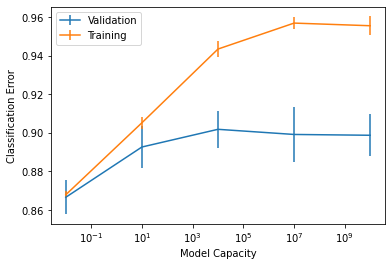

In [43]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

<span style="font-size:1.5em;">�</span> What will be the best lambda value?

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Identify other hyper-parameters and device a mechanism to tune then under hold-out validation framework.</font>**  

Discuss your answer with the lab demonstrator.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Test the final model and use appropriate visualisation techniques to understand the model you have developed.</font>**  

# Exercise: Full Cardiotocography Data Set

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Use the full Cardiotocography Data Set in `Cardiotocography_Data_Set.csv` and see if you can develop a better model.</font>**  
> Now you see how to do this task with the smaller dataset. Repeat the same process for the complete dataset.


> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: There are more convenient functions in sklearn to do grid search for hyper parameter tuning. These are specially useful when there are many hyper parameters to tune. GridSearchCV function is one example. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and understand how it works. </font>** 